# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

mouse_study.head()



# Combine the data into a single dataset.  
#school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
mice_count

249

In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

dup_mice

array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = mouse_study.loc[mouse_study["Mouse ID"]== "g989",:]
dup_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study[mouse_study['Mouse ID'].isin(dup_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].nunique()
clean_df_count

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

ttumor= clean_df.groupby(["Drug Regimen"])

mean_tumor_volume= ttumor["Tumor Volume (mm3)"].mean()
med_tumor_vol= ttumor["Tumor Volume (mm3)"].median()
vol_variance= ttumor["Tumor Volume (mm3)"].var()
std_dev= ttumor["Tumor Volume (mm3)"].std()
std_err= ttumor["Tumor Volume (mm3)"].sem()


tumor_summary = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                "Median Tumor Volume": med_tumor_vol,
                 "Tumor Volume Variance": vol_variance,
                 "Tumor Volume Std. Dev.": std_dev,
                 "Tumor Volume Std. Err": std_err
                })
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


agg_summary= clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

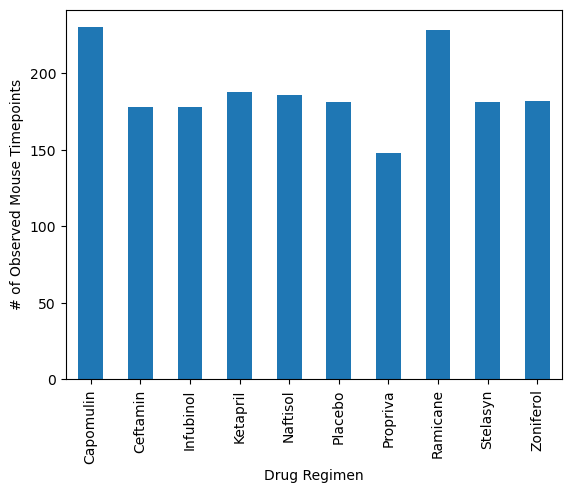

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


barToCart = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


barToCart.plot.bar(y="# of Observed Mouse Timepoints")

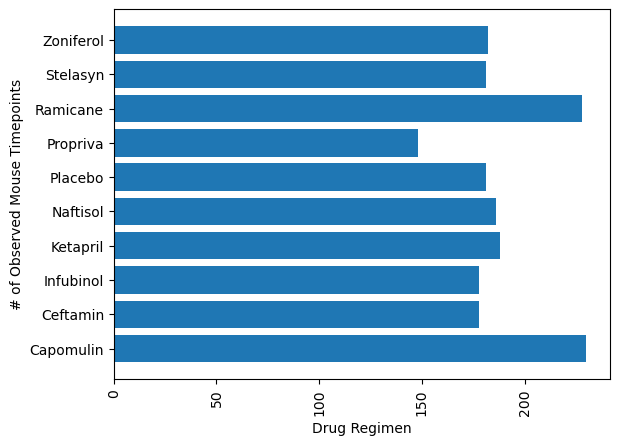

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



drug_names = clean_df.groupby("Drug Regimen").nunique().index
x = drug_names
y = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(rotation=90)
plt.barh(x, y)
plt.show()

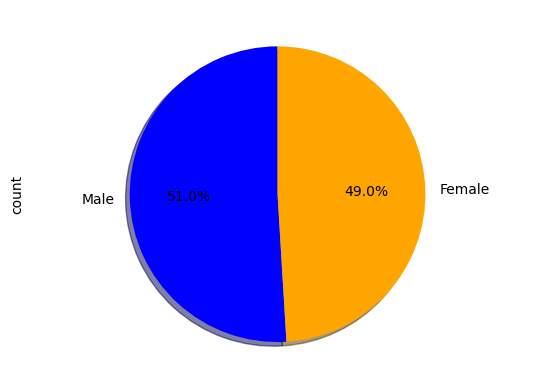

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df=pd.DataFrame(clean_df)

sex_count = df["Sex"].value_counts()


plt.axis("equal")
plt.ylabel("Sex")
sex_count.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=90, colors=["blue","orange"], labels=["Male","Female"])
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

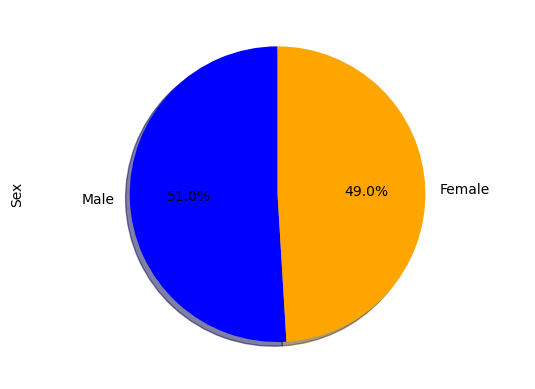

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie = clean_df.groupby(["Sex"])["Mouse ID"].count()
df=pd.DataFrame(clean_df)

sex_count = df["Sex"].value_counts()

labels = ["Male","Female"]
colors = ["blue","orange"]

plt.axis("equal")
plt.pie(sex_count, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=90)
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

listed= clean_df.groupby(["Mouse ID"])
last_tumor_volume= listed["Timepoint"].max()
last_tumor_volume


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

last_df = pd.merge(last_tumor_volume,clean_df, on=("Mouse ID","Timepoint"), how ="inner")
last_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [94]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = {'Capomulin': [],
                  'Ramicane': [],
                   'Infubinol': [], 
                   'Ceftamin': []}


#looping through treatments
for name in treatments:
    for i in last_df.index:
        if last_df.iloc[i]['Drug Regimen'] == name:
            last_df[name].append(last_df.iloc[i]['Tumor Volume (mm3)'])
            
tumor_df = pd.DataFrame(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatments:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = subset['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    second_quartile = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    
    # Add a subset
    subset = max_timepoint_df[max_timepoint_df['Drug Regimen']== name]

    # Bounds
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5 *iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = max_timepoint_df.loc[(max_timepoint_df['Tumor Volume (mm3)'] <= lower_bound) | (max_timepoint_df['Tumor Volume (mm3)'] >= upper_bound)]
print(outliers)



KeyError: 'Capomulin'

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volumes for each treatment group
capomulin_volumes = [volume_1, volume_2, ...]
ramicane_volumes = [volume_1, volume_2, ...]
infubinol_volumes = [volume_1, volume_2, ...]
ceftamin_volumes = [volume_1, volume_2, ...]

# Combine the tumor volumes into a list
data = [capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes]

# Create a box plot
plt.boxplot(data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Add a title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


NameError: name 'volume_1' is not defined

## Line and Scatter Plots

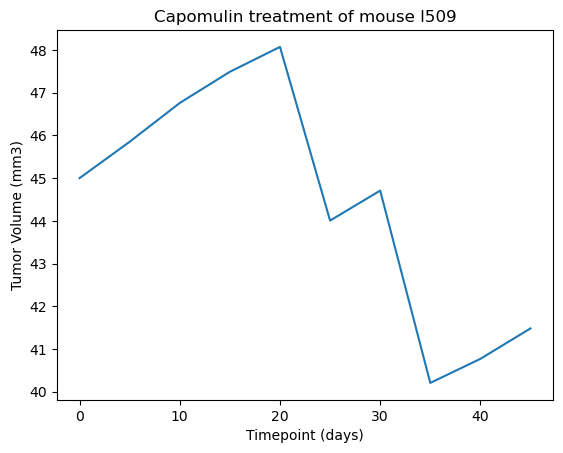

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


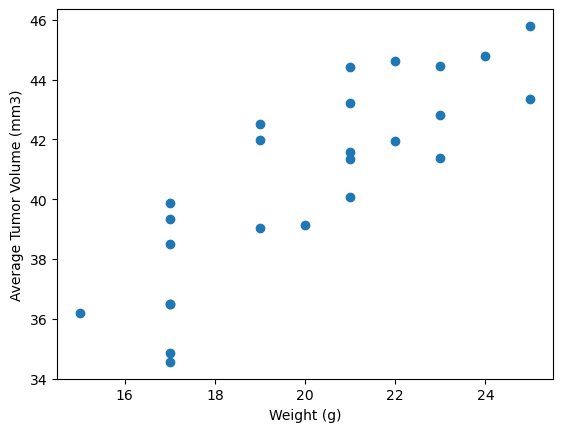

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


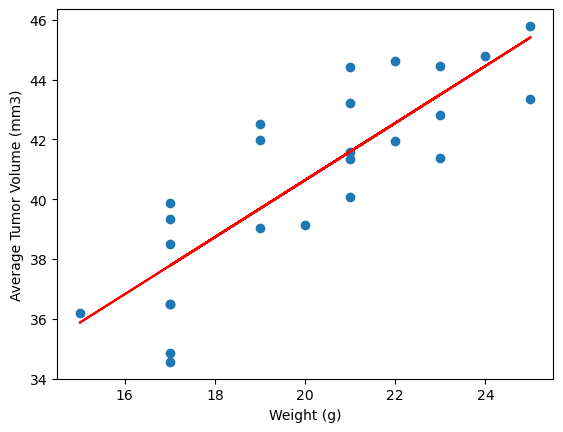

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
